## データ読み込み
ディレクトリを各自の仕様に合わせてください

In [1]:
import pandas as pd

train = pd.read_csv(filepath_or_buffer = "/home/y-toyoda/data/bank/train.csv")

## データ概観

In [2]:
print(train.head(10))

   id  age            job  marital  education default  balance housing loan  \
0   1   39    blue-collar  married  secondary      no     1756     yes   no   
1   2   51   entrepreneur  married    primary      no     1443      no   no   
2   3   36     management   single   tertiary      no      436      no   no   
3   4   63        retired  married  secondary      no      474      no   no   
4   5   31     management   single   tertiary      no      354      no   no   
5   6   29    blue-collar   single  secondary      no      260     yes   no   
6   7   37       services  married  secondary      no       52     yes   no   
7   8   32     technician   single  secondary      no      230     yes   no   
8   9   31         admin.   single  secondary      no        0     yes   no   
9  10   32  self-employed   single   tertiary      no     1815      no   no   

     contact  day month  duration  campaign  pdays  previous poutcome  y  
0   cellular    3   apr       939         1     -1     

## 各種統計量

In [3]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## 変数の型

In [4]:
train.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

## 単変数の集計(連続変数)
ageのヒストグラム

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

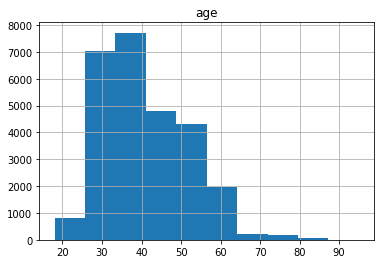

In [5]:
import matplotlib
import matplotlib.pyplot as plt

train.hist(column="age")

## 単変数の集計(質的変数)
jobの集計

In [6]:
train['job'].value_counts()

blue-collar      5886
management       5620
technician       4491
admin.           3085
services         2506
retired          1391
self-employed     945
entrepreneur      914
unemployed        790
housemaid         765
student           557
unknown           178
Name: job, dtype: int64

## 目的変数とのクロス集計(質的変数)
jobとy

In [7]:
pd.crosstab(train['job'],train['y'])

y,0,1
job,,
admin.,2700,385
blue-collar,5456,430
entrepreneur,834,80
housemaid,697,68
management,4853,767
retired,1080,311
self-employed,828,117
services,2282,224
student,391,166


## 目的変数とのクロス集計(連続変数)
ageとy. このとき, ageをカテゴリ化する必要がある.

In [8]:
age_c = pd.cut(train['age'],[0,20,30,40,50,60,100])
print(age_c.head(10))

0     (30, 40]
1     (50, 60]
2     (30, 40]
3    (60, 100]
4     (30, 40]
5     (20, 30]
6     (30, 40]
7     (30, 40]
8     (30, 40]
9     (30, 40]
Name: age, dtype: category
Categories (6, interval[int64]): [(0, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 100]]


In [9]:
pd.crosstab(age_c,train['y'])

y,0,1
age,,
"(0, 20]",39,21
"(20, 30]",3486,655
"(30, 40]",9488,1111
"(40, 50]",6117,602
"(50, 60]",4416,488
"(60, 100]",408,297


## 可視化
maritalの分布

<AxesSubplot:>

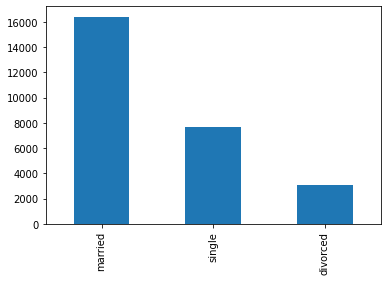

In [25]:
train['marital'].value_counts().plot(kind='bar')